# CARGA DE DATOS

__TODO__

In [1]:
from Utils import DatasetProcess, reconstruction_plot
from ConvModel import ConvModel
from AutoEncoder import TwoStepAutoEncoder, TwoStepClassifier, TwoStepTraining, OneStepAutoencoder, OneStepTraining
from OneClass import AnomalyDetector
from Contrastive import ContrastiveModel

2025-04-03 18:58:42.100996: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743699522.112304  204226 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743699522.116171  204226 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743699522.125549  204226 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743699522.125565  204226 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1743699522.125567  204226 computation_placer.cc:177] computation placer alr

In [2]:
(x_train, y_train), (x_test, y_test) = DatasetProcess.load()


# Aplicar la función hold_out
(x_train_no_labeled, x_train_labeled, y_train_labeled), (x_val, y_val), (x_test, y_test) = DatasetProcess.hold_out(
    (x_train, y_train), (x_test, y_test), validation_size=1000
)

x_train_labeled = x_train_labeled.astype('float32') / 255.0
x_val = x_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Verificar las dimensiones
print(f"Datos no etiquetados: {x_train_no_labeled.shape}")
print(f"Datos etiquetados entrenamiento: {x_train_labeled.shape}")
print(f"Etiquetas entrenamiento: {y_train_labeled.shape}")
print(f"Datos validación: {x_val.shape}")
print(f"Etiquetas validación: {y_val.shape}")
print(f"Datos prueba: {x_test.shape}")
print(f"Etiquetas prueba: {y_test.shape}")

Datos no etiquetados: (40000, 32, 32, 3)
Datos etiquetados entrenamiento: (9000, 32, 32, 3)
Etiquetas entrenamiento: (9000, 1)
Datos validación: (1000, 32, 32, 3)
Etiquetas validación: (1000, 1)
Datos prueba: (10000, 32, 32, 3)
Etiquetas prueba: (10000, 1)


# EJERCICIO 1

Entrena un modelo, creado sobre TensorFlow, haciendo uso únicamente de las instancias etiquetadas de entrenamiento. Dicho modelo debe de tener al menos cuatro capas densas y/o convolucionales.

Responde a las siguientes preguntas:

1. ¿Qué red has escogido? ¿Por qué? ¿Cómo la has entrenado?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Qué conclusiones sacas de los resultados detallados en el punto anterior?

In [3]:
model_base = ConvModel()
history_base = model_base.fit(
    x_train_labeled, 
    y_train_labeled,
    validation_data=(x_val, y_val),
    batch_size=128,
    epochs=100
)

/home/clown/2-semester/3year2sem/maai/maai_env/lib/python3.11/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1743699526.739351  204226 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9661 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:06:00.0, compute capability: 8.6
/home/clown/2-semester/3year2sem/maai/maai_env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


E0000 00:00:1743699531.983278  204226 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
I0000 00:00:1743699533.439430  204375 cuda_dnn.cc:529] Loaded cuDNN version 90501


71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - accuracy: 0.0316 - loss: 9.5664 - val_accuracy: 0.0080 - val_loss: 8.9485
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.0589 - loss: 8.4003 - val_accuracy: 0.0180 - val_loss: 8.7419
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.0777 - loss: 7.4633 - val_accuracy: 0.0190 - val_loss: 8.3972
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.0931 - loss: 6.7080 - val_accuracy: 0.0150 - val_loss: 7.4348
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.1065 - loss: 6.1375 - val_accuracy: 0.0180 - val_loss: 7.1049
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.1139 - loss: 5.7102 - val_accuracy: 0.0120 - val_loss: 6.9358
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - accuracy: 0.1276 - loss: 5.4015 - val_accuracy: 0.0380 - val_loss: 5.9261
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.1479 - loss: 5.0851 - val_accuracy: 0.0580 - val_

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3482 - loss: 3.2283
Accuracy en conjunto de prueba: 0.34779998660087585


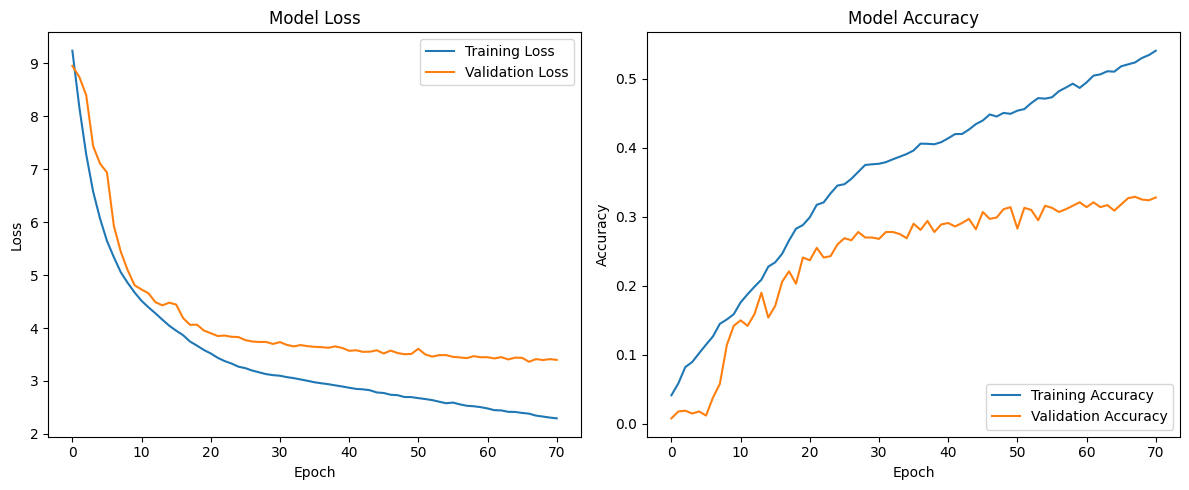

In [4]:
# Evalúa con el conjunto de prueba
test_accuracy = model_base.score(x_test, y_test)
print(f"Accuracy en conjunto de prueba: {test_accuracy}")

model_base.plot(history_base)

# EJERCICIO 2

Entrena el mismo modelo, incorporando las instancias no etiquetadas de entrenamiento mediante la técnica de auto-aprendizaje. Opcionalmente, se ponderará cada instancia de entrada en función de su calidad (o certeza).

Responde a las siguientes preguntas:
1. ¿Qué parámetros has definido para el entrenamiento?
2. ¿Cuál es el rendimiento del modelo en entrenamiento? ¿Y en prueba?
3. ¿Se mejoran los resultados obtenidos en el Ejercicio 1?
4. ¿Qué conclusiones sacas de los resultados detallados en los puntos anteriores?

Epoch 1/100


E0000 00:00:1743699835.212196  204226 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1_1/dropout_5_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


141/141 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.0342 - loss: 17.4218 - val_accuracy: 0.0170 - val_loss: 11.8253
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.0543 - loss: 14.4479 - val_accuracy: 0.0180 - val_loss: 9.4926
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.0796 - loss: 12.3419 - val_accuracy: 0.0110 - val_loss: 8.7704
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.0893 - loss: 11.2447 - val_accuracy: 0.0550 - val_loss: 7.0487
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.1027 - loss: 10.4642 - val_accuracy: 0.0900 - val_loss: 6.4466
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.1054 - loss: 9.9252 - val_accuracy: 0.0990 - val_loss: 6.0192
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.1325 - loss: 9.4181 - val_accuracy: 0.1240 - val_loss: 5.7192
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.1405 - loss: 9.0890 - val_a

E0000 00:00:1743700068.746117  204226 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_2_1/dropout_10_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


165/165 ━━━━━━━━━━━━━━━━━━━━ 19s 88ms/step - accuracy: 0.0646 - loss: 16.1128 - val_accuracy: 0.0200 - val_loss: 10.9978
Epoch 2/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 68ms/step - accuracy: 0.1131 - loss: 12.8197 - val_accuracy: 0.0310 - val_loss: 9.1109
Epoch 3/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - accuracy: 0.1543 - loss: 10.8181 - val_accuracy: 0.0220 - val_loss: 7.9609
Epoch 4/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - accuracy: 0.1710 - loss: 9.7380 - val_accuracy: 0.0490 - val_loss: 6.6034
Epoch 5/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.2051 - loss: 8.9953 - val_accuracy: 0.0790 - val_loss: 6.1061
Epoch 6/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 72ms/step - accuracy: 0.2211 - loss: 8.4752 - val_accuracy: 0.1120 - val_loss: 5.6985
Epoch 7/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.2413 - loss: 8.0455 - val_accuracy: 0.1340 - val_loss: 5.4065
Epoch 8/100
165/165 ━━━━━━━━━━━━━━━━━━━━ 12s 70ms/step - accuracy: 0.2657 - loss: 7.6860 - 

E0000 00:00:1743700532.666095  204226 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


184/184 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.0695 - loss: 15.6109 - val_accuracy: 0.0130 - val_loss: 11.1709
Epoch 2/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.1517 - loss: 11.9229 - val_accuracy: 0.0240 - val_loss: 8.7861
Epoch 3/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.2008 - loss: 9.9045 - val_accuracy: 0.0360 - val_loss: 7.1977
Epoch 4/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.2322 - loss: 8.8517 - val_accuracy: 0.1060 - val_loss: 6.2577
Epoch 5/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.2637 - loss: 8.1849 - val_accuracy: 0.1260 - val_loss: 5.8441
Epoch 6/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.2907 - loss: 7.7033 - val_accuracy: 0.1560 - val_loss: 5.5511
Epoch 7/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.3178 - loss: 7.2338 - val_accuracy: 0.1630 - val_loss: 5.3081
Epoch 8/100
184/184 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.3473 - loss: 6.9470 - val_accu

E0000 00:00:1743700849.958343  204226 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


210/210 ━━━━━━━━━━━━━━━━━━━━ 13s 38ms/step - accuracy: 0.0842 - loss: 14.8712 - val_accuracy: 0.0100 - val_loss: 11.8728
Epoch 2/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.1790 - loss: 10.9999 - val_accuracy: 0.0210 - val_loss: 9.0337
Epoch 3/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.2387 - loss: 8.9690 - val_accuracy: 0.0610 - val_loss: 6.7558
Epoch 4/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.2771 - loss: 7.9588 - val_accuracy: 0.1310 - val_loss: 5.9068
Epoch 5/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.3072 - loss: 7.3455 - val_accuracy: 0.1450 - val_loss: 5.5481
Epoch 6/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.3333 - loss: 6.8772 - val_accuracy: 0.1680 - val_loss: 5.3223
Epoch 7/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.3757 - loss: 6.4712 - val_accuracy: 0.1720 - val_loss: 5.1517
Epoch 8/100
210/210 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.3999 - loss: 6.2261 - val_accu

E0000 00:00:1743701153.069584  204226 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


223/223 ━━━━━━━━━━━━━━━━━━━━ 23s 82ms/step - accuracy: 0.0951 - loss: 14.5164 - val_accuracy: 0.0140 - val_loss: 10.2044
Epoch 2/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.1773 - loss: 10.5461 - val_accuracy: 0.0270 - val_loss: 7.7304
Epoch 3/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 15s 69ms/step - accuracy: 0.2451 - loss: 8.6343 - val_accuracy: 0.0850 - val_loss: 6.3854
Epoch 4/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.2960 - loss: 7.5813 - val_accuracy: 0.1120 - val_loss: 5.9024
Epoch 5/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - accuracy: 0.3371 - loss: 6.9808 - val_accuracy: 0.1440 - val_loss: 5.3974
Epoch 6/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.3729 - loss: 6.4758 - val_accuracy: 0.1630 - val_loss: 5.1676
Epoch 7/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - accuracy: 0.4132 - loss: 6.0710 - val_accuracy: 0.1930 - val_loss: 4.9523
Epoch 8/100
223/223 ━━━━━━━━━━━━━━━━━━━━ 16s 70ms/step - accuracy: 0.4344 - loss: 5.8371 - v

E0000 00:00:1743701676.089745  204226 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


242/242 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.1034 - loss: 14.1388 - val_accuracy: 0.0270 - val_loss: 10.2486
Epoch 2/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.2072 - loss: 9.9212 - val_accuracy: 0.0270 - val_loss: 7.8885
Epoch 3/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.2667 - loss: 8.0762 - val_accuracy: 0.1250 - val_loss: 6.1190
Epoch 4/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.3120 - loss: 7.1371 - val_accuracy: 0.1250 - val_loss: 5.6945
Epoch 5/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.3618 - loss: 6.4841 - val_accuracy: 0.1450 - val_loss: 5.4219
Epoch 6/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.4032 - loss: 6.0504 - val_accuracy: 0.1900 - val_loss: 5.0123
Epoch 7/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.4364 - loss: 5.7117 - val_accuracy: 0.2020 - val_loss: 4.9492
Epoch 8/100
242/242 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.4598 - loss: 5.5482 - val_accur

E0000 00:00:1743701977.753921  204226 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


254/254 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.1061 - loss: 13.9164 - val_accuracy: 0.0190 - val_loss: 10.7241
Epoch 2/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.2267 - loss: 9.6133 - val_accuracy: 0.0420 - val_loss: 7.2904
Epoch 3/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.2702 - loss: 7.7901 - val_accuracy: 0.0960 - val_loss: 6.0682
Epoch 4/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.3300 - loss: 6.9075 - val_accuracy: 0.1310 - val_loss: 5.6011
Epoch 5/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.3708 - loss: 6.2757 - val_accuracy: 0.1570 - val_loss: 5.2328
Epoch 6/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.4205 - loss: 5.8258 - val_accuracy: 0.1890 - val_loss: 4.9633
Epoch 7/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4496 - loss: 5.5019 - val_accuracy: 0.1920 - val_loss: 4.8512
Epoch 8/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4805 - loss: 5.2624 - val_accur

E0000 00:00:1743702215.421941  204226 meta_optimizer.cc:967] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/sequential_1/dropout_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


260/260 ━━━━━━━━━━━━━━━━━━━━ 15s 39ms/step - accuracy: 0.1013 - loss: 13.7638 - val_accuracy: 0.0090 - val_loss: 9.7973
Epoch 2/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.2098 - loss: 9.4213 - val_accuracy: 0.0350 - val_loss: 7.3229
Epoch 3/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.2679 - loss: 7.6169 - val_accuracy: 0.1160 - val_loss: 5.9182
Epoch 4/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.3157 - loss: 6.7437 - val_accuracy: 0.1410 - val_loss: 5.4274
Epoch 5/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.3708 - loss: 6.1462 - val_accuracy: 0.1550 - val_loss: 5.1642
Epoch 6/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.4165 - loss: 5.7166 - val_accuracy: 0.1910 - val_loss: 4.9033
Epoch 7/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.4473 - loss: 5.4142 - val_accuracy: 0.1980 - val_loss: 4.7514
Epoch 8/100
260/260 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.4801 - loss: 5.1445 - val_accura

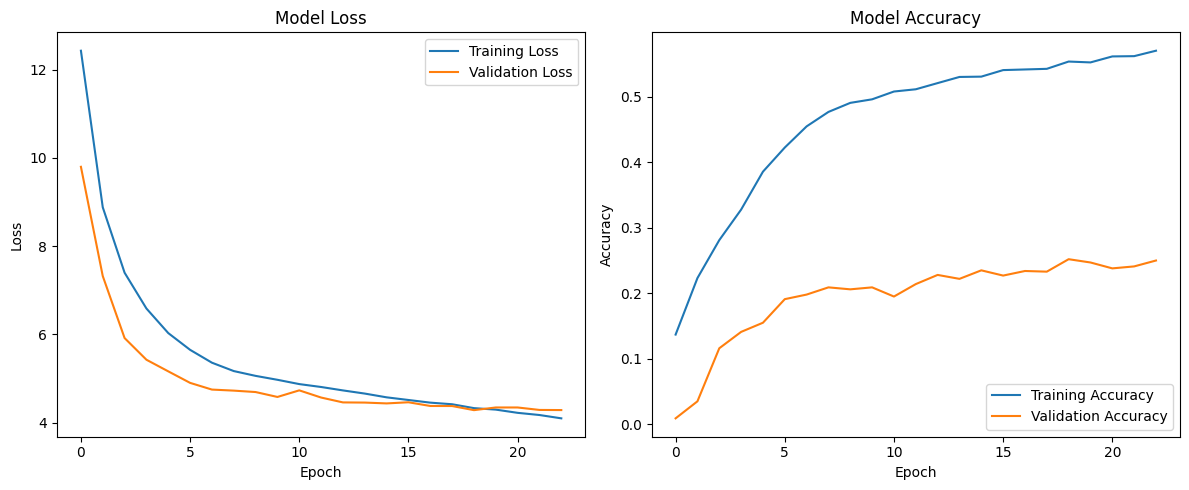

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2645 - loss: 4.1141
Accuracy del modelo final con self-training: 0.26260000467300415
Mejora respecto al modelo base: -0.0852


In [5]:
# Función para crear modelos consistentes durante self-training
def create_model():
    return ConvModel(
        learning_rate=0.0005,  # Learning rate reducido para fine-tuning
        dropout_prob=0.25,     
        l2_lambda=0.005        
    )

# Normalizar datos no etiquetados
x_train_no_labeled = x_train_no_labeled.astype('float32') / 255.0

# Aplica self-training con datos no etiquetados
final_model = ConvModel.self_training_v2(
    model_func=create_model,
    x_train=x_train_labeled,
    y_train=y_train_labeled,  
    unlabeled_data=x_train_no_labeled,
    validation_data=(x_val, y_val),
    thresh=0.85,             
    train_epochs=8,
    verbose=1
)

# Evalúa el modelo final
final_accuracy = final_model.score(x_test, y_test)
print(f"Accuracy del modelo final con self-training: {final_accuracy}")
print(f"Mejora respecto al modelo base: {final_accuracy - test_accuracy:.4f}")